In [1]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from pandas import DataFrame
import sklearn
from pandas import DataFrame
import scikitplot as skplt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
svm=LinearSVC()
kn=KNeighborsClassifier()
rf=RandomForestClassifier()
gnb=GaussianNB()
import matplotlib as mt

In [2]:
import matplotlib as mt
axes= {"linewidth" : 3}
mt.rc("axes", **axes)
font={"weight": 'bold', "family": "Times new roman", "size": 20}
mt.rc("font", **font)

In [3]:
train=pd.read_excel("Final Training data after ADASYN.xlsx")
test=pd.read_excel("Final Test data after ADASYN.xlsx")

In [4]:
dataset.groupby('Phase formation').size()

Phase formation
0     66
1    226
dtype: int64

In [4]:
x_train=train[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
y_train=train[["Formation"]]
x_test=test[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
y_test=test[["Formation"]]

In [5]:
sc=StandardScaler()

In [8]:
x_train1=pd.DataFrame(sc.fit_transform(x_train),columns=names[0:6])
x_train1
x_test1=pd.DataFrame(sc.fit_transform(x_test),columns=names[0:6])

In [9]:
x_train1

,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing
0,-0.664109,0.650713,-0.512789,-0.579096,-0.464206,0.538190
1,0.053885,0.650713,0.059554,-0.988979,0.066182,-1.941113
2,0.395970,0.650713,-0.087833,-0.781231,-0.185942,-0.025235
3,-2.776011,-1.393759,-0.647973,1.471193,-4.107304,0.538190
4,0.923836,0.256726,0.236132,-0.263191,0.695854,0.538190
...,...,...,...,...,...,...
331,-0.393997,0.650713,-0.458298,-0.572411,-0.311837,0.538190
332,-0.951722,-0.904352,-1.300373,1.305140,-0.262831,0.538190
333,0.217684,-1.393759,0.070363,1.401729,0.152510,0.538190
334,-1.197222,0.312513,-1.361658,-0.291905,-0.226196,0.538190


In [7]:
names=["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']

In [13]:
names2=["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']

In [10]:
model=KNeighborsClassifier(n_neighbors=6, metric='euclidean', weights='uniform')

In [11]:
model.fit(x_train1, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [12]:
# Fits the explainer
explainer = shap.Explainer(model.predict, x_test1)
# Calculates the SHAP values
shap_values = explainer(x_test1)

Exact explainer: 114it [00:31,  2.76it/s]                         


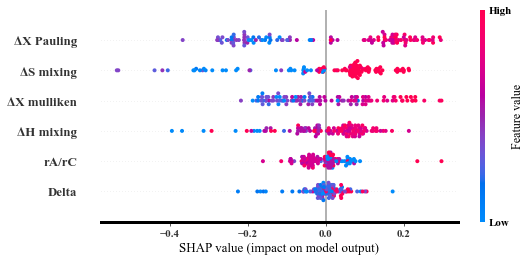

In [29]:
f = plt.figure()
shap.summary_plot(shap_values)
f.savefig('shap1 summary plot after adasyn test set.jpg',dpi=600, bbox_inches='tight')

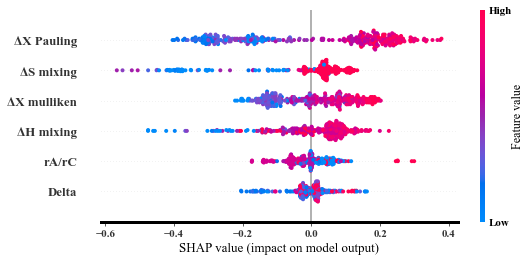

In [89]:
shap.plots.beeswarm(shap_values)

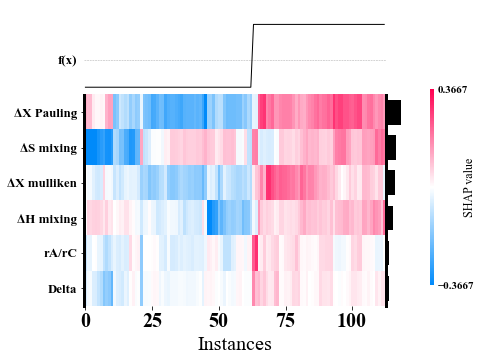

In [14]:
g = plt.figure()
shap.plots.heatmap(shap_values)
#g.savefig('shap values heatmap before adasyn.jpg',dpi=600, bbox_inches='tight')

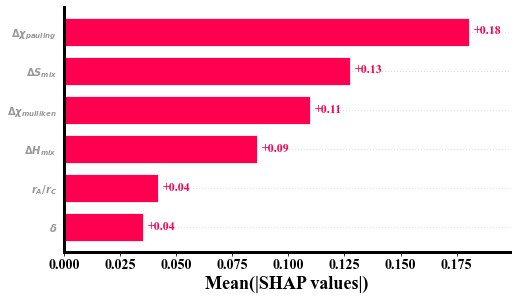

In [24]:
m = plt.figure()
shap.plots.bar(shap_values, show = False)
positions2 = (6, 5, 4, 3, 2, 1)
labels = ("$\Delta \chi_{pauling}$", "$\Delta S_{mix}$", "$\Delta \chi_{mulliken}$", "$\Delta H_{mix}$", "$r_A/r_C$",  "$\delta$" )
plt.xlabel('Mean(|SHAP values|)',fontweight='bold',fontsize= 18 )
plt.yticks(positions2, labels, fontsize= 10)
plt.xticks(fontsize= 14)
m.savefig('shap values before adasyn bar plot test set.jpg',dpi=600, bbox_inches='tight')

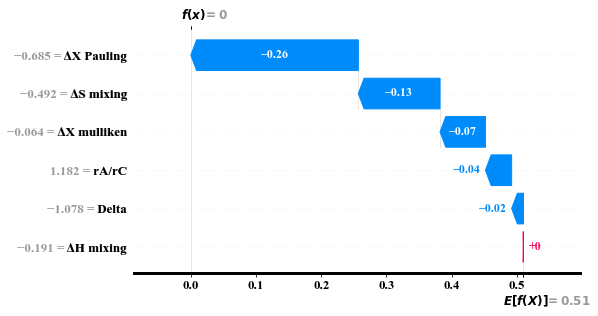

In [94]:
shap.plots.waterfall(shap_values[10])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[1], x_train1)

In [ ]:
expected_value = explainer.expected_value
shap_array = explainer.shap_values(x_train1)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(x_train1.columns))

In [32]:
y_pred1=model.predict(x_test1)

In [34]:
y_pred1=pd.DataFrame(y_pred1)

In [36]:
y_pred1.to_excel("Prediction of test set.xlsx")

In [113]:
dataset=pd.read_excel("Combined data.xlsx")
dataset

,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing,AIC,ΔP-rad,Phase formation
0,2.629500,0.437500,0.9280,0.063086,1.12,13.38,18.186440,2.01000,Single phase
1,2.624000,0.437500,0.9220,0.063086,-0.16,13.38,18.038570,1.99300,Single phase
2,2.543300,0.482759,0.9640,0.026537,-3.84,13.38,18.688520,1.96000,Single phase
3,2.533000,0.451613,1.0120,0.046064,-3.52,13.38,19.836200,2.02600,Single phase
4,2.629800,0.451613,1.0040,0.047429,-3.84,13.38,19.650520,1.98400,Single phase
...,...,...,...,...,...,...,...,...,...
287,2.099125,0.378378,0.7175,0.153609,-42.75,11.52,13.939362,2.02875,Multi phase
288,2.321625,0.500000,0.6550,0.030428,-22.25,11.52,12.309975,1.78625,Multi phase
289,2.414375,0.500000,0.6900,0.015890,-3.50,11.52,13.056875,1.87625,Multi phase
290,2.279875,0.482759,0.4825,0.040656,-6.00,11.52,8.866862,1.93000,Multi phase


In [114]:
x=dataset[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
y=dataset[["Phase formation"]]
y

,Phase formation
0,Single phase
1,Single phase
2,Single phase
3,Single phase
4,Single phase
...,...
287,Multi phase
288,Multi phase
289,Multi phase
290,Multi phase


In [115]:
x_train2, x_test2,  y_train2, y_test2=train_test_split(x, y, test_size=0.25, random_state=42)

In [116]:
x_train2=pd.DataFrame(sc.fit_transform(x_train2),columns=names[0:6])
x_train2
x_test2=pd.DataFrame(sc.fit_transform(x_test2),columns=names[0:6])

In [119]:
# Fits the explainer
explainer2 = shap.Explainer(model.predict, x_test2)
# Calculates the SHAP values
shap_values2 = explainer(x_test2)

Exact explainer: 74it [00:22,  1.80it/s]                        


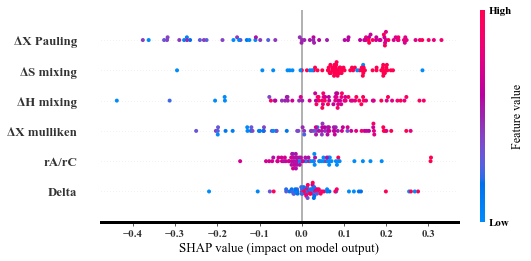

In [120]:
a = plt.figure()
shap.summary_plot(shap_values2)
#a.savefig('shap1 summary plot before adasyn.jpg',dpi=600, bbox_inches='tight')

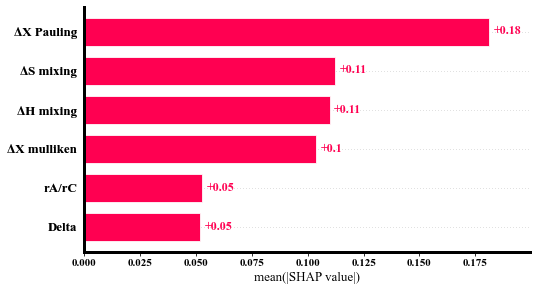

In [121]:
m2 = plt.figure()
shap.plots.bar(shap_values2, show = False)
#m2.savefig('shap values before adasyn bar plot.jpg',dpi=600, bbox_inches='tight')